Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('AWOS_ATMAX_AWOS_ATMIN.TXT', delimiter = "\t", nrows=5)
print(df.columns)


Index(['Unnamed: 0', 'AWOS.ATMAX', 'AWOS.ATMIN'], dtype='object')


In [ ]:
# Read the data from the text file using pandas and parse dates
df = pd.read_csv('AWOS_ATMAX_AWOS_ATMIN.TXT', delimiter = "\t", parse_dates=['Unnamed: 0'])


In [ ]:
# Rename columns if necessary
df.columns = ['Date/Time', 'Max', 'Min']


In [ ]:
# Check the structure of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date/Time  23 non-null     object
 1   Max        23 non-null     object
 2   Min        23 non-null     object
dtypes: object(3)
memory usage: 680.0+ bytes
None


In [ ]:
# Look at basic statistics of the data
print(df.describe())

        Date/Time   Max   Min
count          23    23    23
unique         23    15    19
top     Date/Time  30.9  24.3
freq            1     4     2


In [ ]:
# Check for missing values
print(df.isnull().sum())


Date/Time    0
Max          0
Min          0
dtype: int64


In [ ]:
# If 'Max' and 'Min' are not of numerical datatype, convert them
df['Max'] = pd.to_numeric(df['Max'], errors='coerce')
df['Min'] = pd.to_numeric(df['Min'], errors='coerce')

array([[<Axes: title={'center': 'Max'}>, <Axes: title={'center': 'Min'}>]],
      dtype=object)

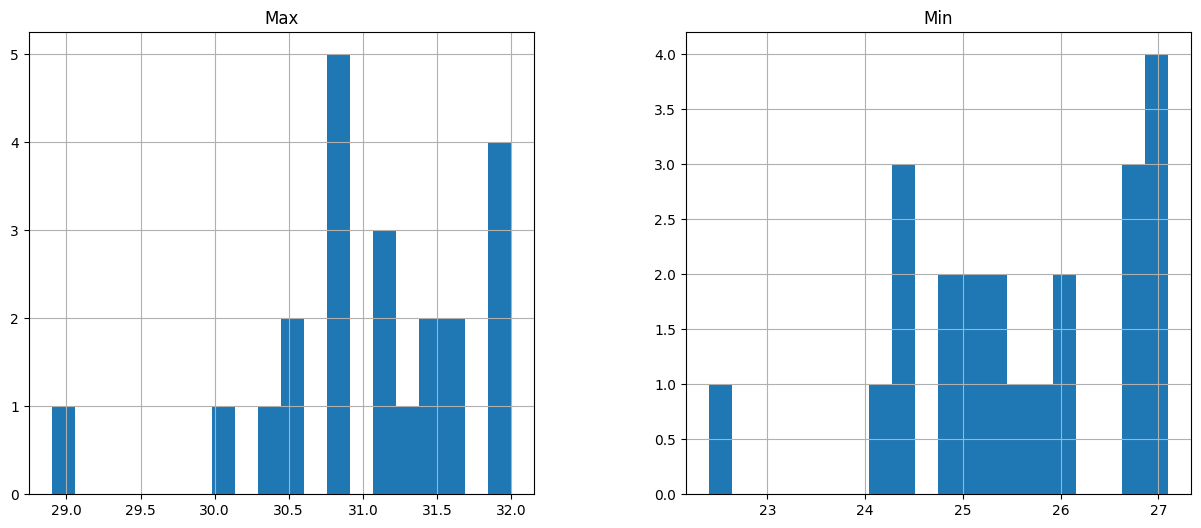

In [ ]:
# Plot a histogram for Max and Min temperatures
df[['Max', 'Min']].hist(bins=20, figsize=(15, 6), layout=(1, 2))

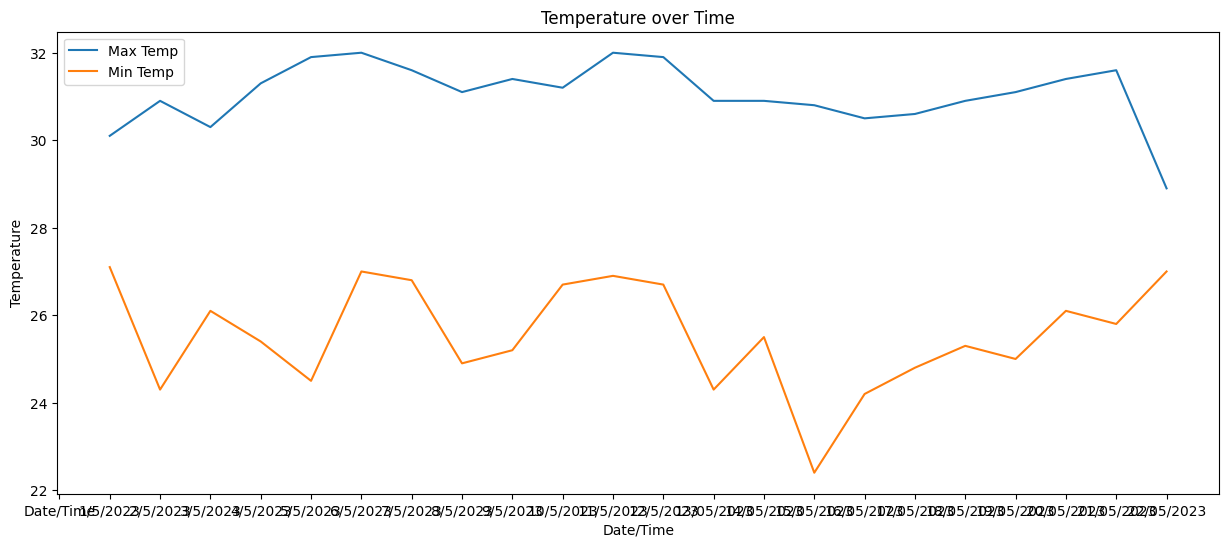

In [ ]:
# Plot Max and Min temperatures over time
plt.figure(figsize=(15,6))
plt.plot(df['Date/Time'], df['Max'], label='Max Temp')
plt.plot(df['Date/Time'], df['Min'], label='Min Temp')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.legend()
plt.show()

In [ ]:
# Filter the dataframe for rows where 'Max' is greater than 30
df_over_30 = df[df['Max'] > 30]

# Print the dates with 'Max' over 30
print(df_over_30['Date/Time'])


1       1/5/2023
2       2/5/2023
3       3/5/2023
4       4/5/2023
5       5/5/2023
6       6/5/2023
7       7/5/2023
8       8/5/2023
9       9/5/2023
10     10/5/2023
11     11/5/2023
12     12/5/2023
13    13/05/2023
14    14/05/2023
15    15/05/2023
16    16/05/2023
17    17/05/2023
18    18/05/2023
19    19/05/2023
20    20/05/2023
21    21/05/2023
Name: Date/Time, dtype: object


<ipython-input-111-16167d9f10e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Matrix')

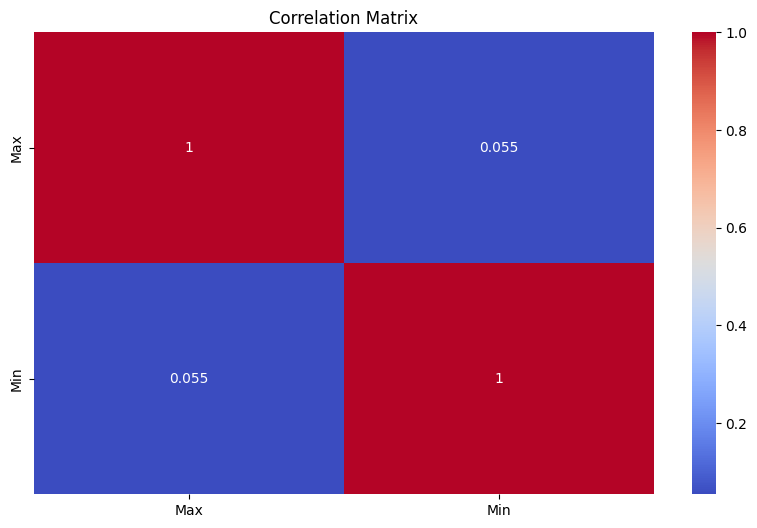

In [ ]:
# Check correlation between Max and Min temperatures
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

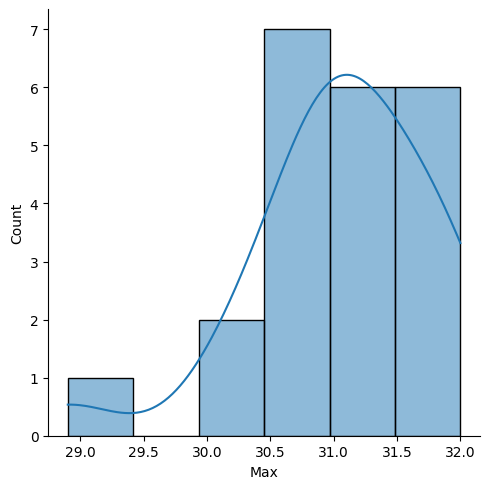

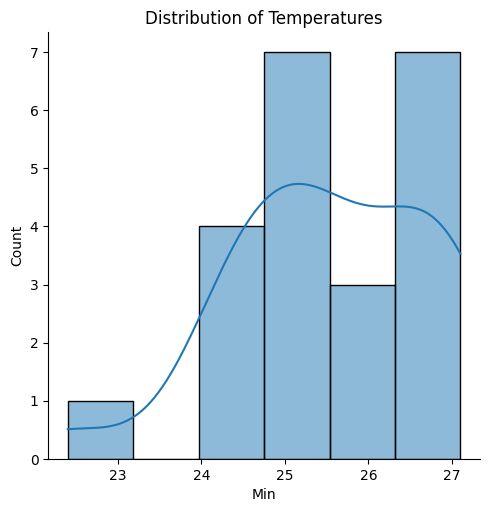

In [ ]:
# Check the distribution of Max and Min temperatures
sns.displot(df['Max'], label='Max Temp', kde=True)
sns.displot(df['Min'], label='Min Temp', kde=True)
plt.title('Distribution of Temperatures')
plt.show()

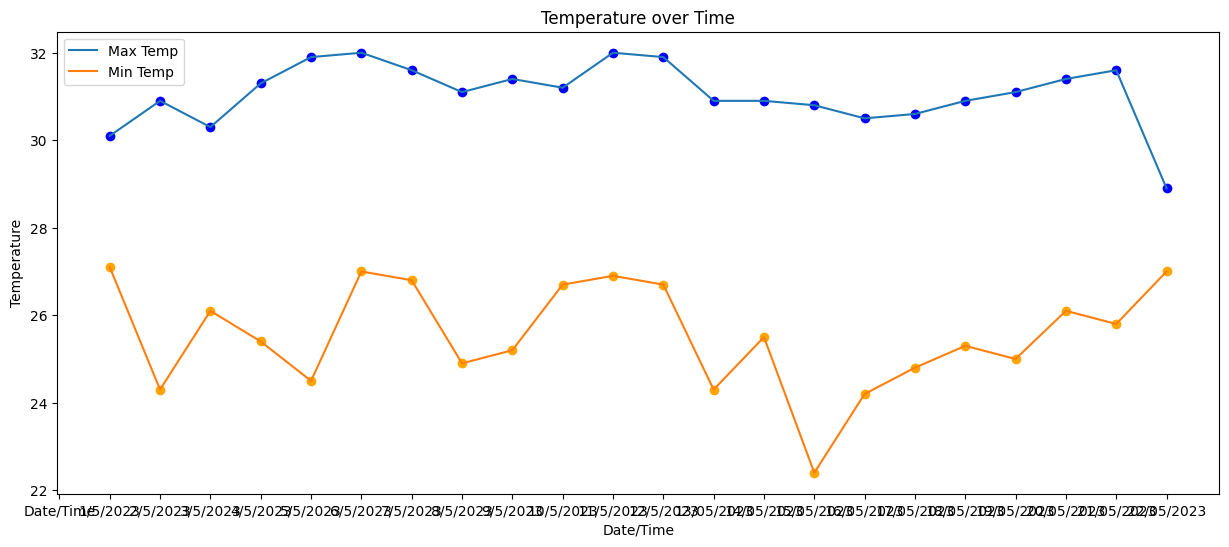

In [ ]:
# Plot Max and Min temperatures over time with points on the lines
plt.figure(figsize=(15,6))
plt.plot(df['Date/Time'], df['Max'], label='Max Temp')
plt.scatter(df['Date/Time'], df['Max'], color='blue')
plt.plot(df['Date/Time'], df['Min'], label='Min Temp')
plt.scatter(df['Date/Time'], df['Min'], color='orange')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.legend()
plt.show()







In [ ]:
# Convert 'Date/Time' to datetime and coerce errors
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

# Print unique values in 'Date/Time'
print(df['Date/Time'].unique())


[                          'NaT' '2023-01-05T00:00:00.000000000'
 '2023-02-05T00:00:00.000000000' '2023-03-05T00:00:00.000000000'
 '2023-04-05T00:00:00.000000000' '2023-05-05T00:00:00.000000000'
 '2023-06-05T00:00:00.000000000' '2023-07-05T00:00:00.000000000'
 '2023-08-05T00:00:00.000000000' '2023-09-05T00:00:00.000000000'
 '2023-10-05T00:00:00.000000000' '2023-11-05T00:00:00.000000000'
 '2023-12-05T00:00:00.000000000' '2023-05-13T00:00:00.000000000'
 '2023-05-14T00:00:00.000000000' '2023-05-15T00:00:00.000000000'
 '2023-05-16T00:00:00.000000000' '2023-05-17T00:00:00.000000000'
 '2023-05-18T00:00:00.000000000' '2023-05-19T00:00:00.000000000'
 '2023-05-20T00:00:00.000000000' '2023-05-21T00:00:00.000000000'
 '2023-05-22T00:00:00.000000000']


<ipython-input-114-b08b8e2fb99b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')


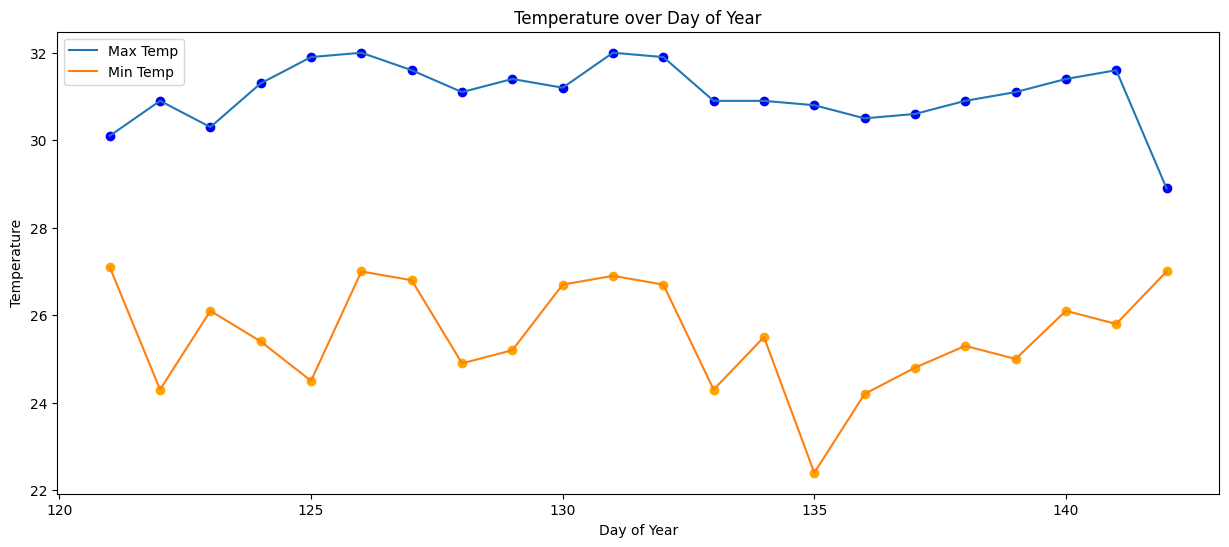

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file using pandas, skip the first row
df = pd.read_csv('AWOS_ATMAX_AWOS_ATMIN.TXT', delimiter = "\t", skiprows=1, header=None)

# Rename columns for better readability
df.columns = ['Date/Time', 'Max', 'Min']

# Convert 'Date/Time' to datetime with dayfirst=True
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True, errors='coerce')

# If 'Max' and 'Min' are not of numerical datatype, convert them
df['Max'] = pd.to_numeric(df['Max'], errors='coerce')
df['Min'] = pd.to_numeric(df['Min'], errors='coerce')

# Create a new column 'Day of Year'
df['Day of Year'] = df['Date/Time'].dt.dayofyear

# Plot Max and Min temperatures over 'Day of Year' with points on the lines
plt.figure(figsize=(15,6))
plt.plot(df['Day of Year'], df['Max'], label='Max Temp')
plt.scatter(df['Day of Year'], df['Max'], color='blue')
plt.plot(df['Day of Year'], df['Min'], label='Min Temp')
plt.scatter(df['Day of Year'], df['Min'], color='orange')
plt.xlabel('Day of Year')
plt.ylabel('Temperature')
plt.title('Temperature over Day of Year')
plt.legend()
plt.show()
